In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
def correct_t():
    files = [f for f in os.listdir('diff_res') if f.startswith(f'imagenet')]
    accuracies = np.zeros([len(files),100])
    for fi,file in enumerate(files):
        a = np.zeros(100)
        if file.startswith(f'imagenet'):
            with open(f'diff_res/{file}', 'r') as f:
                lines = f.readlines()
                for i, line in enumerate(lines[1:]):
                    if 'correct: True' in line:
                        a[i]=1
        else:
            print('wrong file',fi)
        accuracies[fi]=a
        
    return accuracies


In [13]:
arr = correct_t()

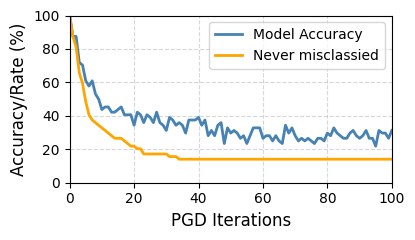

In [27]:
# Plot style
# plt.style.use('seaborn-v0_8-whitegrid')  # clean background
pgd_iters = range(101)
accuracy = arr.mean(axis=0)
accuracy = np.append([1], accuracy) * 100
arr_min = np.cumprod(arr > 0.5, axis=1).mean(axis=0)
arr_min = np.append([1], arr_min) * 100  # Convert to percentage
# Create figure with dual y-axis
fig, ax = plt.subplots(nrows=1, figsize=(4.25, 2.5), sharex=True)

# Line plot with markers
ax.plot(pgd_iters, accuracy, label='Model Accuracy',
         color='steelblue', linewidth=2)
ax.plot(pgd_iters, arr_min, label="Never misclassied", linewidth=2, color='orange')

# Axis labels and title
ax.set_xlabel('PGD Iterations', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)

# Set y-axis limit (optional)

# Ticks
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

ax.set_ylabel('Accuracy/Rate (%)', fontsize=12)

# Set y-axis limit (optional)
ax.set_ylim(0, 100)
ax.set_xlim(0, 100)

# Grid and legend
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()

# Tight layout for spacing
fig.tight_layout()

# Show or save
fig.savefig("accuracy_vs_pgd_line.pdf", bbox_inches='tight')
plt.show()


array([0.875   , 0.8125  , 0.65625 , 0.59375 , 0.484375, 0.40625 ,
       0.375   , 0.359375, 0.34375 , 0.328125, 0.3125  , 0.296875,
       0.28125 , 0.265625, 0.265625, 0.265625, 0.25    , 0.234375,
       0.21875 , 0.21875 , 0.203125, 0.203125, 0.171875, 0.171875,
       0.171875, 0.171875, 0.171875, 0.171875, 0.171875, 0.171875,
       0.15625 , 0.15625 , 0.15625 , 0.140625, 0.140625, 0.140625,
       0.140625, 0.140625, 0.140625, 0.140625, 0.140625, 0.140625,
       0.140625, 0.140625, 0.140625, 0.140625, 0.140625, 0.140625,
       0.140625, 0.140625, 0.140625, 0.140625, 0.140625, 0.140625,
       0.140625, 0.140625, 0.140625, 0.140625, 0.140625, 0.140625,
       0.140625, 0.140625, 0.140625, 0.140625, 0.140625, 0.140625,
       0.140625, 0.140625, 0.140625, 0.140625, 0.140625, 0.140625,
       0.140625, 0.140625, 0.140625, 0.140625, 0.140625, 0.140625,
       0.140625, 0.140625, 0.140625, 0.140625, 0.140625, 0.140625,
       0.140625, 0.140625, 0.140625, 0.140625, 0.140625, 0.140

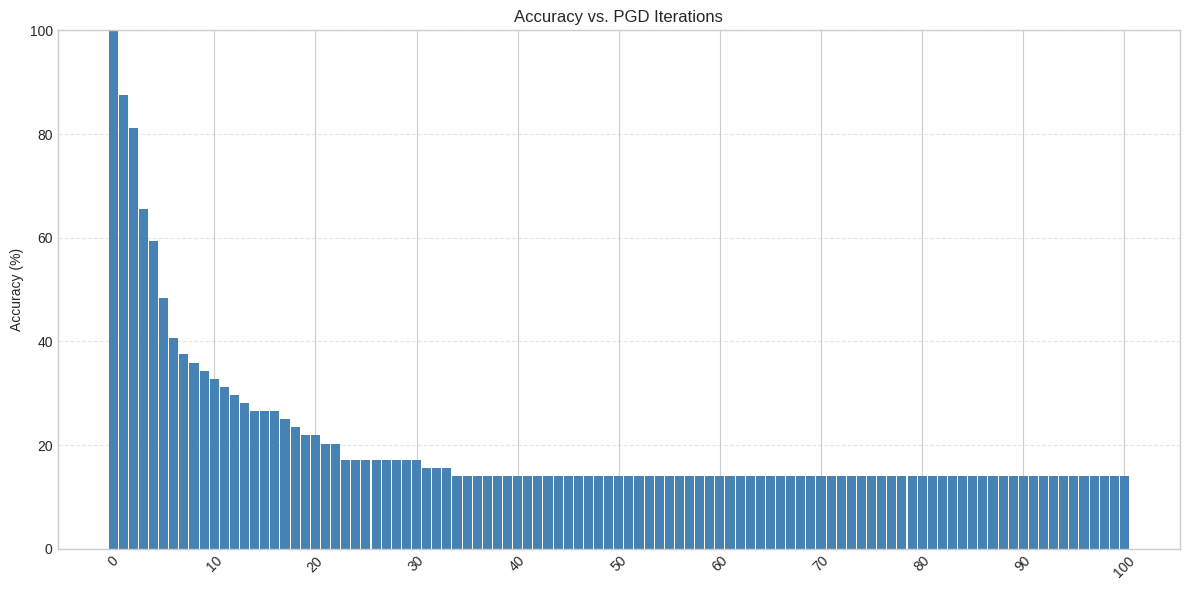

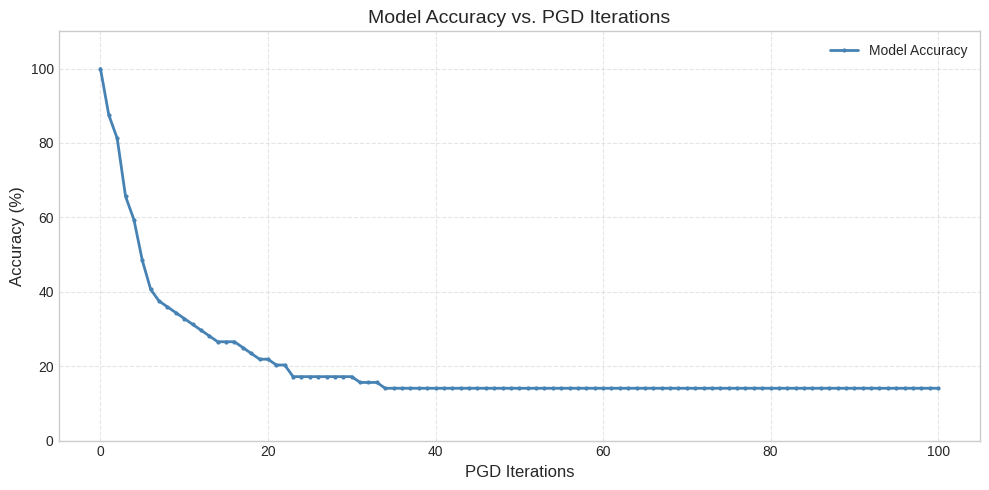

In [7]:
# Plot style
plt.style.use('seaborn-v0_8-whitegrid')  # clean background

# Create figure
plt.figure(figsize=(10, 5))

# Line plot with markers
plt.plot(pgd_iters, accuracy, label='Model Accuracy',
         color='steelblue', linewidth=2, marker='.', markersize=4)

# Axis labels and title
plt.xlabel('PGD Iterations', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Model Accuracy vs. PGD Iterations', fontsize=14)

# Set y-axis limit (optional)
plt.ylim(0, 110)

# Ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Tight layout for spacing
plt.tight_layout()

# Show or save
plt.savefig("accuracy_vs_pgd_w_line.pdf", bbox_inches='tight')
plt.show()